In [93]:
import sys
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


df = pd.read_csv("chip1__Model.csv")

getting the data from the csv file.

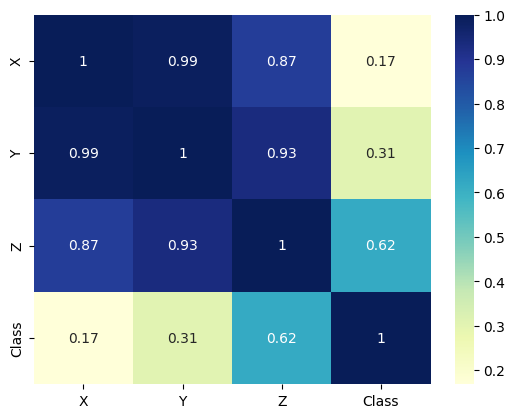

In [94]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
plt.show()

plotting the correlation heatmap to check the correlation.

In [95]:
df = df.sample(frac=1)

n_train = math.floor(0.5 * df.shape[0])
n_test = math.ceil((1-0.5) * df.shape[0])
X_train = df[:n_train]
y_train = df[:n_train]
X_test = df[n_train:]
y_test = df[n_train:]
#print("Total Number of rows in train:",X_train.shape[0])
#print("Total Number of rows in test:",X_test.shape[0])


Splitting the data into train test, and also shuffling it before splitting.

In [96]:

X_train=X_train.drop(columns="Class")
X_test=X_test.drop(columns="Class")

#X_train=X_train.drop(columns="skewness")
#X_train=X_train.drop(columns="curtosis")
#X_train=X_train.drop(columns="variance")
#
#X_test=X_test.drop(columns="skewness")
#X_test=X_test.drop(columns="curtosis")
#X_test=X_test.drop(columns="variance")


y_train=y_train.drop(columns="X")
y_train=y_train.drop(columns="Y")
y_train=y_train.drop(columns="Z")

y_test=y_test.drop(columns="X")
y_test=y_test.drop(columns="Y")
y_test=y_test.drop(columns="Z")


Dropping unnecessary columns for making it easier.

In [97]:
l_rate = 0.01
iterations = 5000

m,n=X_train.shape
W = np.zeros(n)
b=0

Setting up the learning rate and the number of iterations to converge the loss function.

In [98]:
X_train=X_train.to_numpy().astype(np.float64)
y_train=y_train.to_numpy().astype(np.float64)
X_test=X_test.to_numpy().astype(np.float64)
y_test=y_test.to_numpy().astype(np.float64)

Converting the matrix to numpy array.

In [99]:
for i in range(iterations) :
    
    A = 1 / (1 + np.exp(-(X_train.dot(W) + b)))    
    temp = A- y_train.T
    
    temp = np.reshape(temp,m)
    dW = np.dot(X_train.T, temp) / m
    db = np.sum(temp)/m
    
    W = W -l_rate*dW
    b = b - l_rate*db
    
    
Z = 1 / (1 + np.exp(-(X_test.dot(W) + b)))

for_rocauc = Z

Y_pred = np.where(Z>0.5,1,0)

C:\Users\Anwit\AppData\Local\Temp\ipykernel_51488\2430062382.py:3: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-(X_train.dot(W) + b)))


Applying the gradient descent algorithm to get the optimum parameters, and then we put the test inputs, and setting the class label as 1 or 0 based on the probability, the output of the sigmoid function.

In [100]:
y_test

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],

In [101]:
m = np.asmatrix(Y_pred).T

In [102]:
true_positives = np.matmul(np.transpose(m),y_test)
precision_deno = np.matmul(np.transpose(m),m)
recall_deno = np.matmul(np.transpose(y_test),y_test)

recall_deno

#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

finalf1 = 2*(true_positives/precision_deno)*(true_positives/recall_deno) / ((true_positives/precision_deno) + (true_positives/recall_deno) )

print("The F1 score is :-")
print(finalf1)


The F1 score is :-
[[1.]]


Implementing F1 score from scratch. 

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [103]:
final_rows, final_columns = y_test.shape

In [104]:
print("The accuracy score is :-")
acc_score_nume = final_rows - (recall_deno + precision_deno - (2*true_positives) )
acc_score_deno = final_rows
print(acc_score_nume / acc_score_deno)

The accuracy score is :-
[[1.]]


Implementing Accuracy score from scratch.

In [105]:
auc = np.round(roc_auc_score(y_test, for_rocauc), 3)
print("Auc score is :-")
print(auc)

Auc score is :-
1.0


Implementing ROC-AUC score using sklearn.